# **Задача 5**

## Вариант 1

Проанализировать данные о стоимости недвижимости (`kc_house_data.csv`).

Уровень значимости ($\alpha$): 0.05

## 1. Предположение о распределении цены

Мы предполагаем, что цены распределены **нормально**. Проверим гипотезу о нормальности.

#### Гипотезы
*   **$H_0$:** Выборка цен $X$ получена из нормального распределения $N(\mu, \sigma^2)$.
*   **$H_1$:** Выборка цен $X$ не принадлежит нормальному распределению.

#### Критерий согласия Колмогорова
Статистика критерия $D_n$ определяется как максимальное расхождение между эмпирической функцией распределения $F_n(x)$ и теоретической функцией $F_0(x)$:
$$ D_n = \sup_x |F_n(x) - F_0(x)| $$

Критическое значение для $\alpha=0.05$ при $n > 35$ рассчитывается приближенно как:
$$ D_{crit} \approx \frac{1.36}{\sqrt{n}} $$

In [3]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('kc_house_data.csv')
prices = df['price'].dropna().values
print(f"Количество записей: {len(prices)}")

Количество записей: 21613


In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
def manual_kolmogorov_test(data, alpha=0.05):
    n = len(data)

    # оценка mu и sigma
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)

    # стандартизация данных
    data_sorted = np.sort(data)
    z_scores = (data_sorted - mean_val) / std_val

    # функция распределения
    cdf_theoretical = stats.norm.cdf(z_scores)

    # Эмпирическая CDF (ступенчатая функция: 1/n, 2/n, ... n/n)
    ecdf = np.arange(1, n + 1) / n

    # вычисление D-статистики
    d_stat = np.max(np.abs(ecdf - cdf_theoretical))

    # асимптотика Колмогорова
    critical_value = 1.36 / np.sqrt(n)

    print(f"\n--- Критерий Колмогорова ---")
    print(f"Объем выборки n: {n}")
    print(f"Статистика D: {d_stat:.6f}")
    print(f"Критическое значение (alpha={alpha}): {critical_value:.6f}")

    plt.figure(figsize=(10, 4))
    plt.plot(z_scores, cdf_theoretical, label='Theoretical CDF (Normal)', color='red')
    plt.step(z_scores, ecdf, label='Empirical CDF', where='post', alpha=0.7)
    plt.title('Сравнение Эмпирической и Теоретической CDF')
    plt.legend()
    plt.grid(True)
    plt.show()


    if d_stat > critical_value:
        print("РЕЗУЛЬТАТ: Отвергаем H0.")
    else:
        print("РЕЗУЛЬТАТ: Не отвергаем H0.")




--- Критерий Колмогорова ---
Объем выборки n: 21613
Статистика D: 0.145729
Критическое значение (alpha=0.05): 0.009251


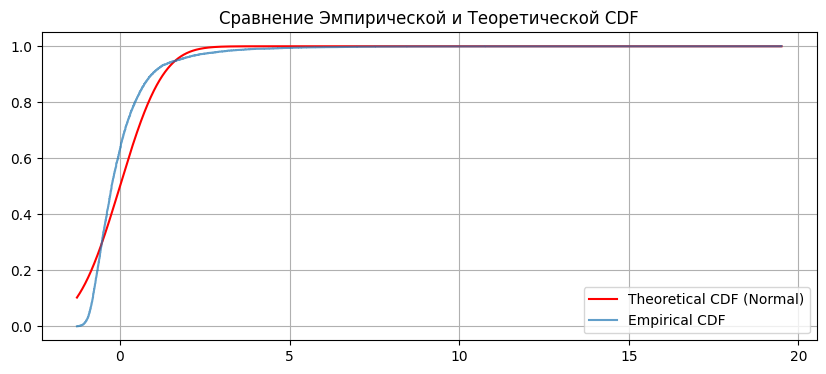

РЕЗУЛЬТАТ: Отвергаем H0.


In [7]:
manual_kolmogorov_test(prices)

Мы видим огромный зазор между синей и красной линией (в левой части).
Синяя линия взлетает вверх гораздо резче. Это значит, что дешевых домов в реальности гораздо больше, чем предсказывает нормальное распределение.
Следовательно, данные не распределены нормально.

In [8]:
res_scipy = stats.kstest((prices - np.mean(prices))/np.std(prices, ddof=1), 'norm')
print(f"\nПроверка библиотекой scipy p-value: {res_scipy.pvalue:.6e}")


Проверка библиотекой scipy p-value: 0.000000e+00


*Дополнительное предположение:* Более подходящим законом распределения может являться **лог-нормальное распределение**.

ПРОВЕРКА ГИПОТЕЗЫ О ЛОГ-НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ

--- Критерий Колмогорова ---
Объем выборки n: 21613
Статистика D: 0.025988
Критическое значение (alpha=0.05): 0.009251


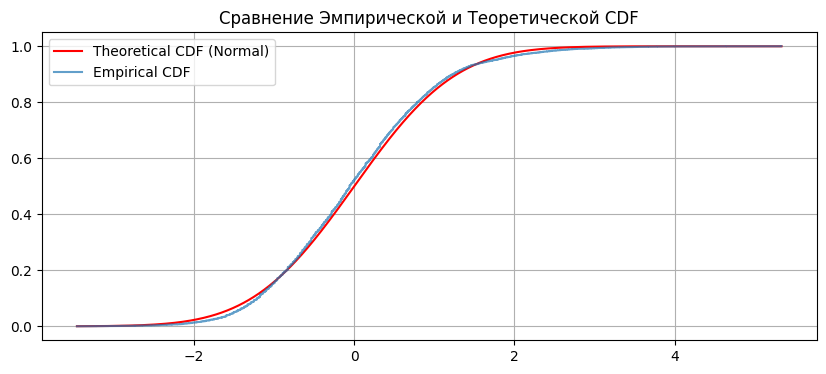

РЕЗУЛЬТАТ: Отвергаем H0.


In [9]:
prices_log = np.log(prices)

print("ПРОВЕРКА ГИПОТЕЗЫ О ЛОГ-НОРМАЛЬНОМ РАСПРЕДЕЛЕНИИ")
manual_kolmogorov_test(prices_log)

Отвержение гипотезы обусловлено очень большим объемом выборки ($n=21613$), при котором критерий Колмогорова становится чувствительным к малейшим отклонениям реальных данных от теоретической модели.

Однако сравнение статистик показывает значительное улучшение модели: значение статистики $D$ уменьшилось с $0.145$ (для нормального распределения) до $0.026$ (для лог-нормального).

Визуальный анализ (совпадение линий CDF и формы гистограммы) подтверждает, что **лог-нормальное распределение** является хорошим приближением для описания цен на недвижимость.

**Критерий согласия Пирсона (Хи-квадрат)**

Он работает по принципу группировки данных в "корзины", поэтому повторяющиеся значения для него не проблема, они просто попадают в один интервал.

In [17]:
def chi_square_test_robust(data, bins=50, alpha=0.05, label="Data"):
    n = len(data)
    mean_val = np.mean(data)
    std_val = np.std(data, ddof=1)

    # Observed (наблюдаемые частоты)
    observed_freq, bin_edges = np.histogram(data, bins=bins)

    # Expected (теоретические частоты)
    cdf_vals = stats.norm.cdf(bin_edges, loc=mean_val, scale=std_val)
    expected_probs = np.diff(cdf_vals)
    expected_freq = expected_probs * n

    valid_mask = expected_freq >= 5

    f_obs = observed_freq[valid_mask]
    f_exp = expected_freq[valid_mask]

    if len(f_obs) < 3:
        print(f"Ошибка: Слишком мало валидных интервалов ({len(f_obs)}) для теста.")
        return

    # нормировка: сумма Expected должна быть равна сумме Observed
    f_exp = f_exp * (np.sum(f_obs) / np.sum(f_exp))

    # Хи-квадрат
    chi2_stat, p_value = stats.chisquare(f_obs=f_obs, f_exp=f_exp, ddof=2)

    print(f"\n--- Результаты теста Хи-квадрат (Robust) для '{label}' ---")
    print(f"Изначально интервалов: {bins}")
    print(f"Использовано интервалов (после фильтрации E>=5): {len(f_obs)}")
    print(f"Статистика Chi2: {chi2_stat:.4f}")
    print(f"P-value: {p_value:.6e}")

    if p_value < alpha:
        print("ВЫВОД: Отвергаем H0. Распределение отличается от нормального.")
    else:
        print("ВЫВОД: Не отвергаем H0.")

    # 5. Визуализация (строим по исходным данным для наглядности)
    plt.figure(figsize=(10, 5))
    plt.hist(data, bins=bins, density=True, alpha=0.6, color='skyblue', label='Эмпирическое', edgecolor='gray')

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 1000)
    p = stats.norm.pdf(x, mean_val, std_val)
    plt.plot(x, p, 'r', linewidth=2, label='Теоретическое (Normal)')

    plt.title(f'Распределение: {label}')
    plt.legend()
    plt.show()


--- Результаты теста Хи-квадрат (Robust) для 'Price' ---
Изначально интервалов: 50
Использовано интервалов (после фильтрации E>=5): 12
Статистика Chi2: 7072.1505
P-value: 0.000000e+00
ВЫВОД: Отвергаем H0. Распределение отличается от нормального.


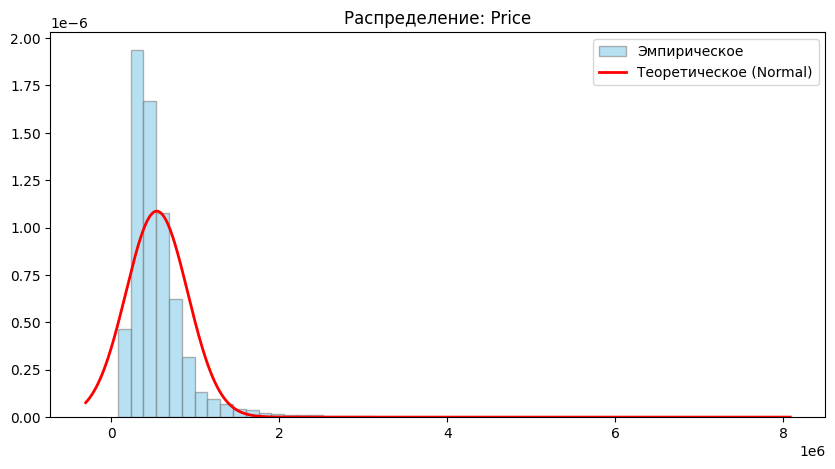

In [18]:
chi_square_test_robust(prices, label="Price")


--- Результаты теста Хи-квадрат (Robust) для 'Log Price' ---
Изначально интервалов: 50
Использовано интервалов (после фильтрации E>=5): 39
Статистика Chi2: 777.0648
P-value: 5.637674e-140
ВЫВОД: Отвергаем H0. Распределение отличается от нормального.


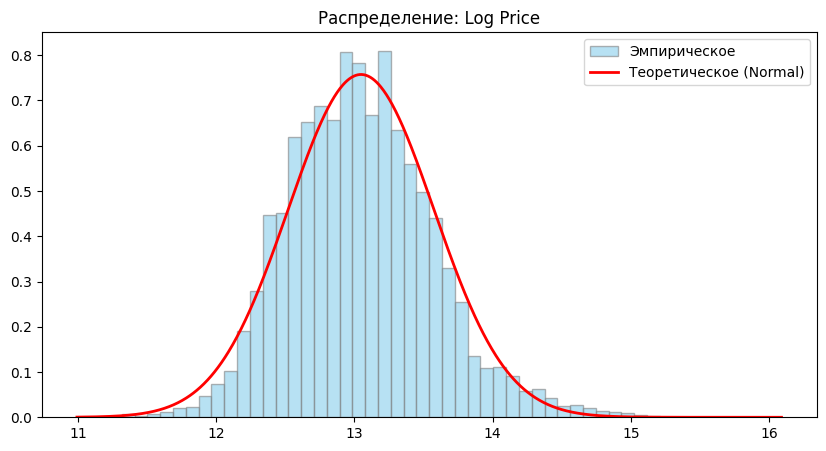

In [19]:
chi_square_test_robust(np.log(prices), label="Log Price")

### Анализ результатов теста Хи-квадрат

** Исходные цены:**
Получено значение статистики $\chi^2 \approx 7072.15$.
Это значение многократно превышает критический порог (для уровня значимости $\alpha=0.05$ и данного числа степеней свободы критическое значение $\approx 60-70$).
$P$-value практически равно нулю ($p < 0.05$).

**Вывод:** Гипотеза $H_0$ о нормальном распределении цен **отвергается**. Распределение цен имеет сильную правостороннюю асимметрию (длинный "хвост" в сторону дорогих домов), что не соответствует свойствам нормального закона.

### Проверка лог-нормального распределения

Поскольку цены на недвижимость не распределены нормально, проверим гипотезу о том, что логарифм цены ($\ln(price)$) имеет нормальное распределение. Это стандартная практика для финансовых величин.


## 2. Сравнение цен старого и нового фонда

Проверим, отличается ли распределение цен на дома, построенные до 2000 года, и дома, построенные после (включая) 2000 года.

#### Группировка
*   **Группа 1 (Old):** `yr_built` < 2000
*   **Группа 2 (New):** `yr_built` >= 2000

#### Формализация гипотез
Так как в предыдущем пункте мы отвергли нормальность, использовать t-тест Стьюдента некорректно. Используем непараметрический **U-критерий Манна-Уитни**.

*   **$H_0$:** $F_{old}(x) = F_{new}(x)$. Вероятность того, что случайный дом из нового фонда дороже случайного дома из старого, равна 0.5. (Распределения одинаковы).
*   **$H_1$:** $F_{old}(x) \neq F_{new}(x)$. Существует сдвиг в распределениях.


Используем готовую реализацию `scipy.stats.mannwhitneyu`.

Объем выборки 'Old' (<2000): 16854
Объем выборки 'New' (>=2000): 4759
Средняя цена Old: 517986.82
Средняя цена New: 618359.97

--- Критерий Манна-Уитни ---
Статистика U: 32126595.0
P-value: 8.345800e-98
РЕЗУЛЬТАТ: Отвергаем H0. Распределения цен статистически значимо различаются.


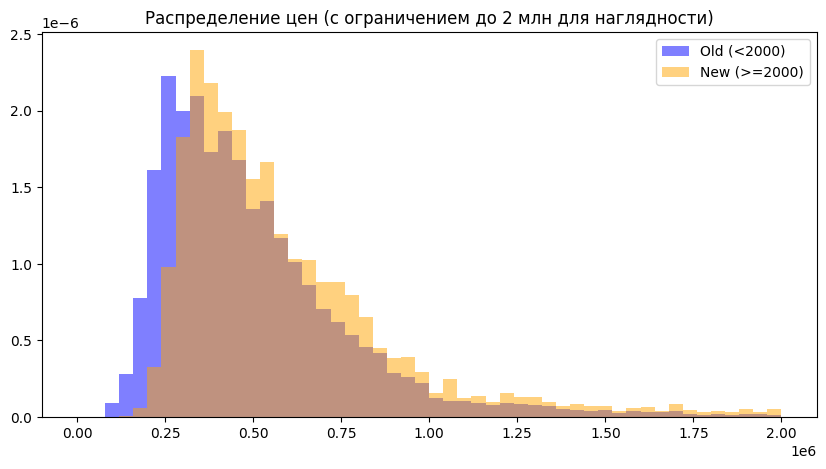

In [16]:
threshold = 2000
prices_old = df[df['yr_built'] < threshold]['price'].values
prices_new = df[df['yr_built'] >= threshold]['price'].values

print(f"Объем выборки 'Old' (<{threshold}): {len(prices_old)}")
print(f"Объем выборки 'New' (>={threshold}): {len(prices_new)}")
print(f"Средняя цена Old: {np.mean(prices_old):.2f}")
print(f"Средняя цена New: {np.mean(prices_new):.2f}")

stat_u, p_value_u = stats.mannwhitneyu(prices_old, prices_new, alternative='two-sided')

print(f"\n--- Критерий Манна-Уитни ---")
print(f"Статистика U: {stat_u}")
print(f"P-value: {p_value_u:.6e}")

if p_value_u < 0.05:
    print("РЕЗУЛЬТАТ: Отвергаем H0. Распределения цен статистически значимо различаются.")
else:
    print("РЕЗУЛЬТАТ: Не отвергаем H0. Различий не найдено.")


plt.figure(figsize=(10, 5))
plt.hist(prices_old, bins=50, alpha=0.5, label='Old (<2000)', density=True, color='blue', range=(0, 2000000))
plt.hist(prices_new, bins=50, alpha=0.5, label='New (>=2000)', density=True, color='orange', range=(0, 2000000))
plt.title('Распределение цен (с ограничением до 2 млн для наглядности)')
plt.legend()
plt.show()

**Средние значения:** Средняя цена домов нового фонда ($\approx 618$ тыс.) на **100,000** выше, чем у старого фонда ($\approx 518$ тыс.).

**Критерий Манна-Уитни:**
      **P-value:** $8.35 \times 10^{-98}$ (ничтожно малое значение, $p \ll 0.05$).
     Нулевая гипотеза $H_0$ о равенстве распределений **отвергается**.

На гистограмме отчетливо видно смещение распределения цен нового фонда (оранжевый цвет) вправо относительно старого фонда (синий цвет). "Тяжелый хвост" высоких цен у новых домов выражен сильнее.


Итого, существует **статистически значимое различие** в стоимости старого и нового жилья. Цены на недвижимость, построенную после 2000 года, больше (выше), чем на недвижимость старого фонда. Это подтверждается как непараметрическим тестом, так и сравнением средних значений.